# Project 1. 가위바위보 이미지 분류

### (1) 필요한 모듈 import

In [122]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

### (2) 데이터 준비

#### 1) train data 불러오기

In [124]:
# 데이터 불러오는 함수
def load_data(img_path, number_of_data):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성한다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print(f"이미지 개수는 {idx}개 이다")
    return imgs, labels

In [125]:
# train data 가져오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 3001)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터 shape 확인하기
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

이미지 개수는 3001개 이다
x_train shape: (3001, 224, 224, 3)
y_train shape: (3001,)


라벨:  0


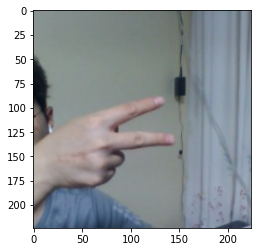

In [126]:
# 데이터 1개 추출해서 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### (3) 딥러닝 모델 생성 및 훈련

#### 1) 모델 생성

**Convolution Layer**  
 : 2차원 이미지를 다루는 함수이다.  
Conv2D(input_channel, kernel_size, activation, input_shape)  
* input_channel : 얼마나 다양한 이미지의 특징을 살펴볼 것인지, 값이 클수록 많은 특징을 살펴본다.  
* kernal_size : kernal 또는 filter라고 불리는 하나의 행렬의 크기를 의미한다. 이 필터를 통해 이미지 데이터에 합성곱을 수행하면서 이미지의 특징을 추출해낸다.  
* activation : 어떤 활성함수를 적용할지 결정한다.  
* input_shape : 특징을 추출해 낼 이미지 데이터의 크기를 받는 파라미터.    
    

**Pooling Layer**  
 : Convolution Layer의 출력 데이터를 입력으로 받아 출력 데이터의 크기를 줄이거나 특정 데이터를 강조하는 용도.  
* MaxPooling : Pooling Layer의 입력으로 받은 크기의 특정 영역에서 최대값을 추출한다.  
* AveragePooling : 특정 영역의 평균값을 추출한다.  
* MinPooling : 특정 영역의 최솟값을 추출한다.    

**Dropout Layer**  
 : 일종의 Regularization 방법, 일부 Hidden Layer의 네트워크 중 일부를 생략하는 방법으로 Overfitting을 예방할 수 있다.

**Flatten Layer**  
 : CNN의 데이터 타입을 Fully Connected Neural Network의 형태로 변경하는 레이어    
 
**Dense Layer**  
 : 입력과 출력을 연결해주는 레이어, 입력 뉴런과 출력 뉴런을 곱한 값 만큼의 연결선을 가지며, 이는 가중치를 포함하고 있다.  
Dense(Output_Neuron, activation)  
* Output_Neuron : 출력 뉴런의 수를 정하는 파라미터  
* activation : 활성화 함수 설정

In [185]:
# 동일한 결과 출력을 위한 seed 설정
tf.random.set_seed(123)

# Layer에 사용될 파라미터 값 지정
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 52, 52, 64)      

#### 2) 모델 훈련

In [186]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
94/94 [==============================] - 8s 84ms/step - loss: 3.8256 - accuracy: 0.3008
Epoch 2/10
94/94 [==============================] - 8s 83ms/step - loss: 1.0581 - accuracy: 0.4255
Epoch 3/10
94/94 [==============================] - 8s 83ms/step - loss: 0.7620 - accuracy: 0.6676
Epoch 4/10
94/94 [==============================] - 8s 83ms/step - loss: 0.4889 - accuracy: 0.8015
Epoch 5/10
94/94 [==============================] - 8s 83ms/step - loss: 0.3178 - accuracy: 0.8675
Epoch 6/10
94/94 [==============================] - 8s 83ms/step - loss: 0.2319 - accuracy: 0.9173
Epoch 7/10
94/94 [==============================] - 8s 83ms/step - loss: 0.2119 - accuracy: 0.9256
Epoch 8/10
94/94 [==============================] - 8s 83ms/step - loss: 0.1591 - accuracy: 0.9447
Epoch 9/10
94/94 [==============================] - 8s 83ms/step - loss: 0.1666 - accuracy: 0.9435
Epoch 10/10
94/94 [==============================] - 8s 83ms/step - loss: 0.1538 - accuracy: 0.9354


### (4) 모델 성능 테스트

#### 1) test data 불러오기

In [187]:
# load_data 함수로 test data 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test1"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터 shape 확인
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

이미지 개수는 300개 이다
x_test shape: (300, 224, 224, 3)
y_test shape: (300,)


#### 2) 모델 성능 테스트

In [188]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.9276 - accuracy: 0.7033
test_loss: 0.9276412725448608 
test_accuracy: 0.70333331823349


### Project 1 정리

#### 모델 성능 개선
**Problem 1. Overfitting**  
* 본인 이미지 데이터 300장을 통해 학습시켰을 때 Training Accuracy는 0.9이상 매우 높은 성능을 보였으나, 다른 사람의 이미지 데이터 300장을 통해 테스트 할 경우 Test Accuracy가 0.3 정도로 매우 낮게 측정된다.    

**Solution 1. 학습 데이터 늘리기**  
* 학습 데이터 부족으로 인한 Overfitting문제가 발생했다고 생각돼 이미지 데이터를 3000개 준비    
* 결과 : 약간의 성능 향상은 있었으나 0.4 ~ 0.5 정도의 정확도로 만족할만한 성능이 측정되진 않았다.    

**Solution 2. Image Resizing 미사용**  
* 학습 데이터 개수를 늘려도 해결되지 않아 이미지의 특징이 resizing 과정에서 많이 사라졌다고 판단해 resizing을 하지 않고 원본 size인 (224, 224, 3) 크기로 학습 진행  
* Solution 1과 동일하게 0.5 정도의 정확도로 큰 성능의 향상을 얻지는 못했다.    

**Solution 3. 정규화**  
* 정규화의 방법 중 하나인 Dropout Layer를 추가해 학습 네트워크의 일부를 생략해 Overfitting을 방지했다.  
* 점차 0.6 이상의 정확도를 측정할 수 있었다.    

**Solution 4. 하이퍼파라미터 튜닝**  
* Conv2D Layer의 Input Channel, Dense Layer의 Output Neuron, Epoch 등 학습에 영향을 줄 수 있는 하이퍼파라미터의 값을 조정하며 성능을 향상시켰다.
* 0.6 ~ 0.7 정도의 정확도를 측정할 수 있었다.



#### 결과  
**최종 정확도 70%** 가 나왔다. seed를 설정해 난수로 인해 결과값이 변하지 않도록 설정해 주었다.